# Turismo de Portugal em Gráficos  com matplotlib

Com os dados do ficheiro pordata1.xls, usando a interface orientada a objetos do 
Matplotlib, obtenha os seguintes gráficos: 
1. Gráfico da evolução ao longo dos anos nas regiões NUTS III da média e máximo 
do valor total. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import ScalarFormatter
class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"

plt.style.use('ggplot')
pd.options.display.max_columns=200
import plotly.express as px
filename = 'pordata1.xls'

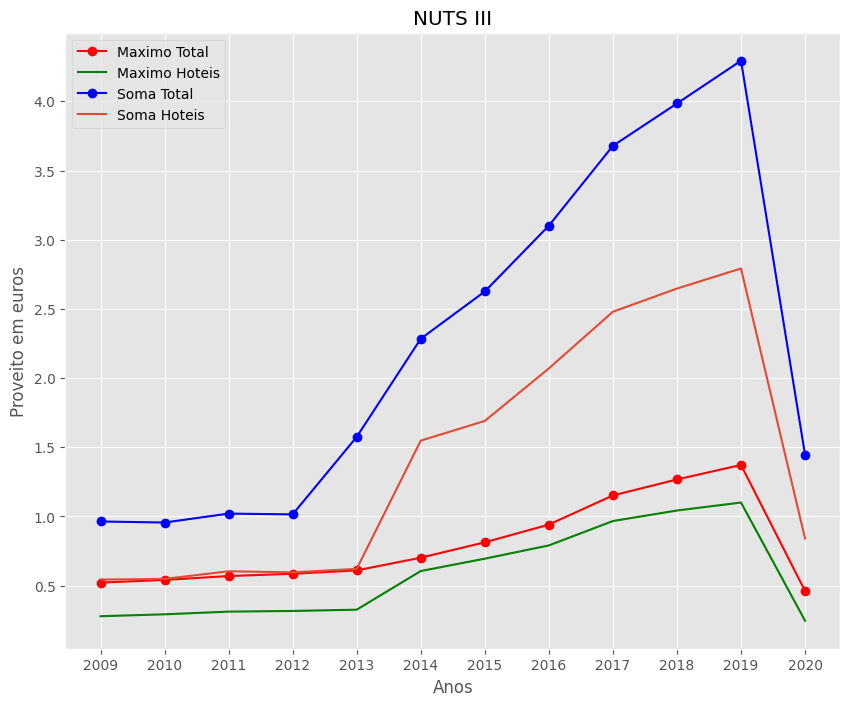

In [2]:
pordata = pd.read_excel(io=filename,index_col='Âmbito Geográfico',skiprows=[0])

pordata_temp = pordata.loc['NUTS III']

y=[]
y2=[]
for i in pordata.columns[1:]:
    y.append(pordata_temp[i].max()/ 1e+6)
    y2.append(pordata_temp[i].sum()/ 1e+6)
y
x = list(str(i) for i in range(2009,pordata.columns[1:13].__len__()+2009))
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
ax1.set_title('NUTS III')
ax1.plot(x,y[0:12],color='r',marker='o')
ax1.plot(x,y[12:],color='g')
ax1.plot(x,y2[0:12],color='b',marker='o')
ax1.plot(x,y2[12:])
ax1.legend(['Maximo Total','Maximo Hoteis','Soma Total','Soma Hoteis'])
ax1.set_xlabel('Anos')
ax1.set_ylabel('Proveito em euros')
fig.savefig('../Guiao7/images/turismo_plt/ex1.png',dpi=500,bbox_inches='tight',format='png')
# se quiser em notaçao cientifica
#yScalarFormatter = ScalarFormatterClass(useMathText=True)
#yScalarFormatter.set_powerlimits((0,0))
#ax1.yaxis.set_major_formatter(yScalarFormatter)





Gráfico da evolução ao longo dos anos dos valores mínimo, médio e máximo do 
valor total de um dado Âmbito Geográfico (ex: Município). Desenvolva uma 
função que tenha como parâmetros uma DataFrame e uma string com o Âmbito 
Geográfico. Teste a função criando gráficos para NUTS I, NUTS II, NUT III e 
Munícipio. 


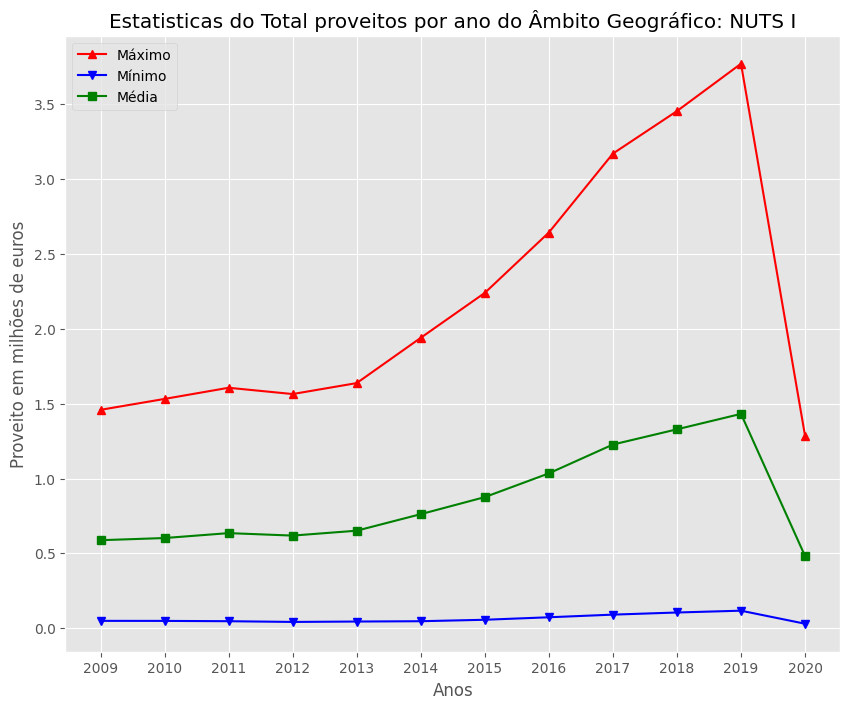

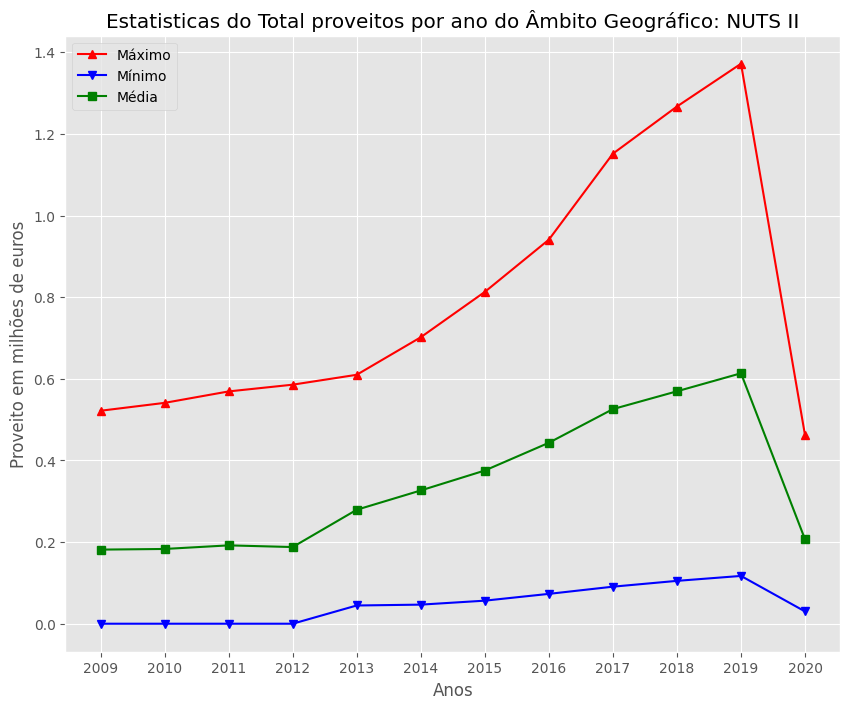

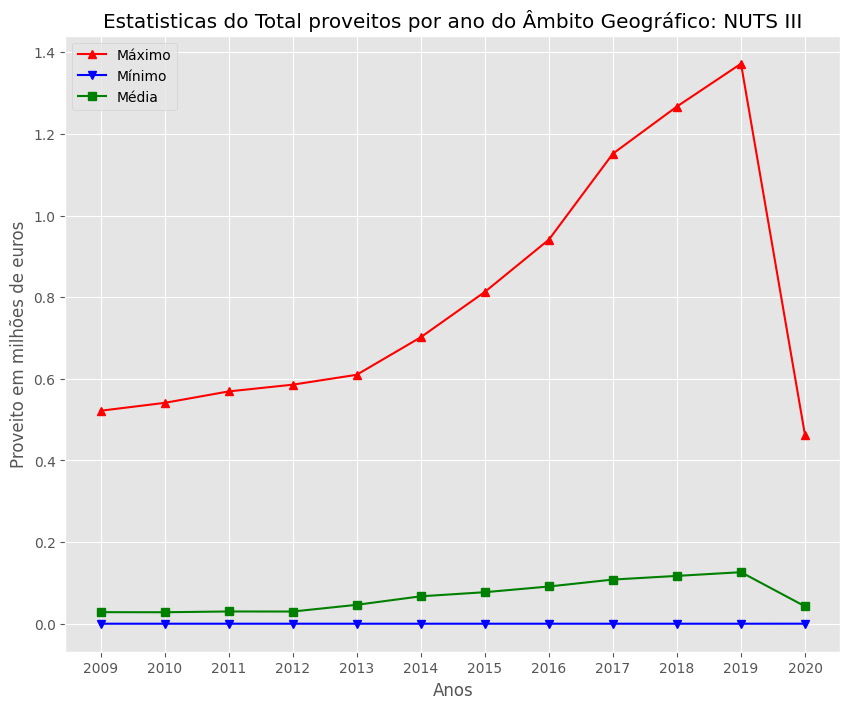

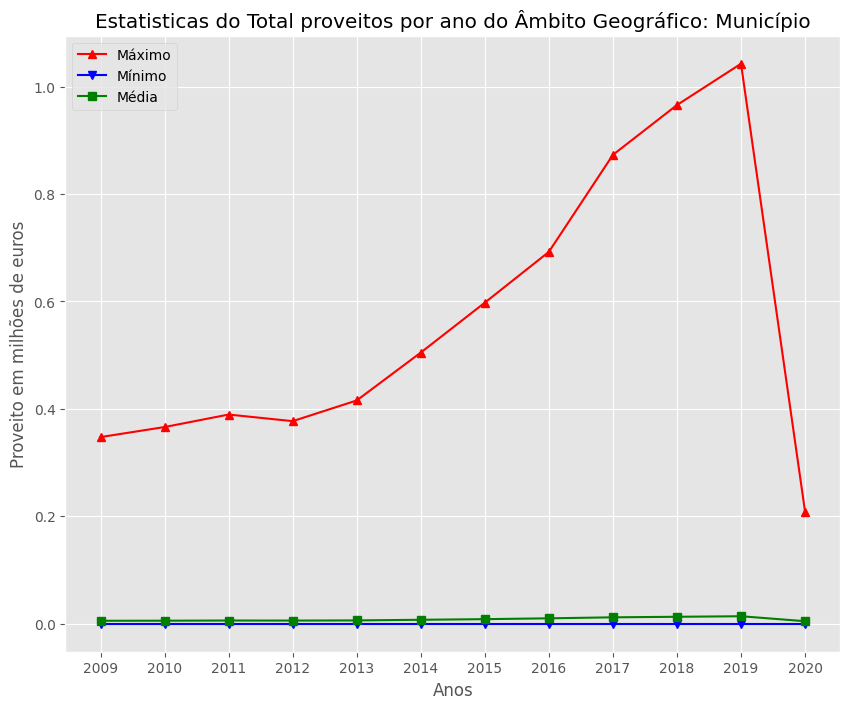

In [3]:
def stsgraph1(ag,pordata):
    pordata_temp = pordata.loc[ag]
    x = list(str(i) for i in range(2009,pordata.columns[1:13].__len__()+2009))
    y_min=[]
    y_max=[]
    y_mean=[]
    for i in pordata.columns[1:]:
        y_max.append(pordata_temp[i].max() / 1e+6)
        y_min.append(pordata_temp[i].min() / 1e+6)
        y_mean.append(pordata_temp[i].mean() / 1e+6)
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10,8)
    ax1.set_title('Estatisticas do Total proveitos por ano do Âmbito Geográfico: '+ag)
    ax1.plot(x,y_max[0:12],color='r',marker='^')
    ax1.plot(x,y_min[0:12],color='b',marker='v')
    ax1.plot(x,y_mean[0:12],color='g',marker='s')
    ax1.legend(['Máximo','Mínimo','Média'])
    ax1.set_xlabel('Anos')
    ax1.set_ylabel('Proveito em milhões de euros')
    fig.savefig('../Guiao7/images/turismo_plt/ex2_'+ag+'.svg',format='SVG')

    
stsgraph1('NUTS I',pordata)
stsgraph1('NUTS II',pordata)
stsgraph1('NUTS III',pordata)
stsgraph1('Município',pordata)

Histogramas dos valores apenas dos Hotéis para dois anos indicados como 
parâmetros considerando os dados para um determinado âmbito geográfico (ex: 
NUTS III). A função a desenvolver deve ter ainda como parâmetro o “Âmbito 
Geográfico”, com o valor por defeito “NUTS III”. Os 2 histogramas devem ficar 
lado a lado. 


C:\Users\moham\AppData\Local\Temp\ipykernel_13932\3591261725.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 30)
C:\Users\moham\AppData\Local\Temp\ipykernel_13932\3591261725.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 30)


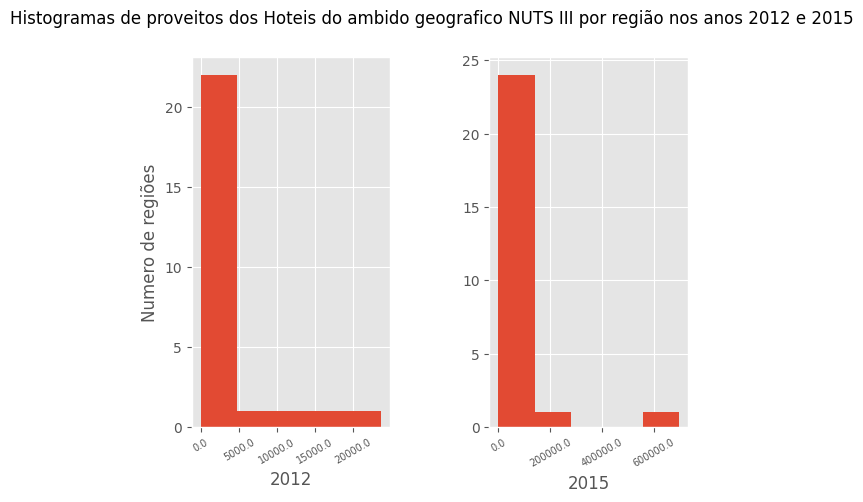

In [12]:
def stsHotel_years(year_1,year_2,ag='NUTS III'):
    data = pordata.loc[ag,[('HOTEIS_'+str(year_1)),('HOTEIS_'+str(year_2))]]
    data = data.loc[~(data>0).all(axis=1)]
    plt.rc('xtick',labelsize=7)
    yy_year_1 = data.loc[ag,('HOTEIS_'+str(year_1))].sort_values(ascending=False).tolist()
    yy_year_2 = data.loc[ag,('HOTEIS_'+str(year_2))].sort_values(ascending=False) 
    fig, axs = plt.subplots(1,2)


    axs[0].hist(yy_year_1,bins=5)
    axs[1].hist(yy_year_2,bins=5)


    fig.subplots_adjust(hspace=0.5,wspace=0.5)
    fig.suptitle('Histogramas de proveitos dos Hoteis do ambido geografico '+ag+' por região nos anos ' +str(year_1) +' e '+ str(year_2))
    axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 30)
    axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 30)


    axs[0].set_xlabel(year_1)
    axs[0].set_ylabel('Numero de regiões')
    axs[1].set_xlabel(year_2)
    #axs[1].set_ylabel('Numero de regiões')
    fig.savefig('../Guiao7/images/turismo_plt/ex3_'+ag+'_'+str(year_1)+'_and_'+str(year_2)+'.svg',format='SVG')
stsHotel_years(2012,2015)

Boxplots dos valores totais das regiões NUTS II. 


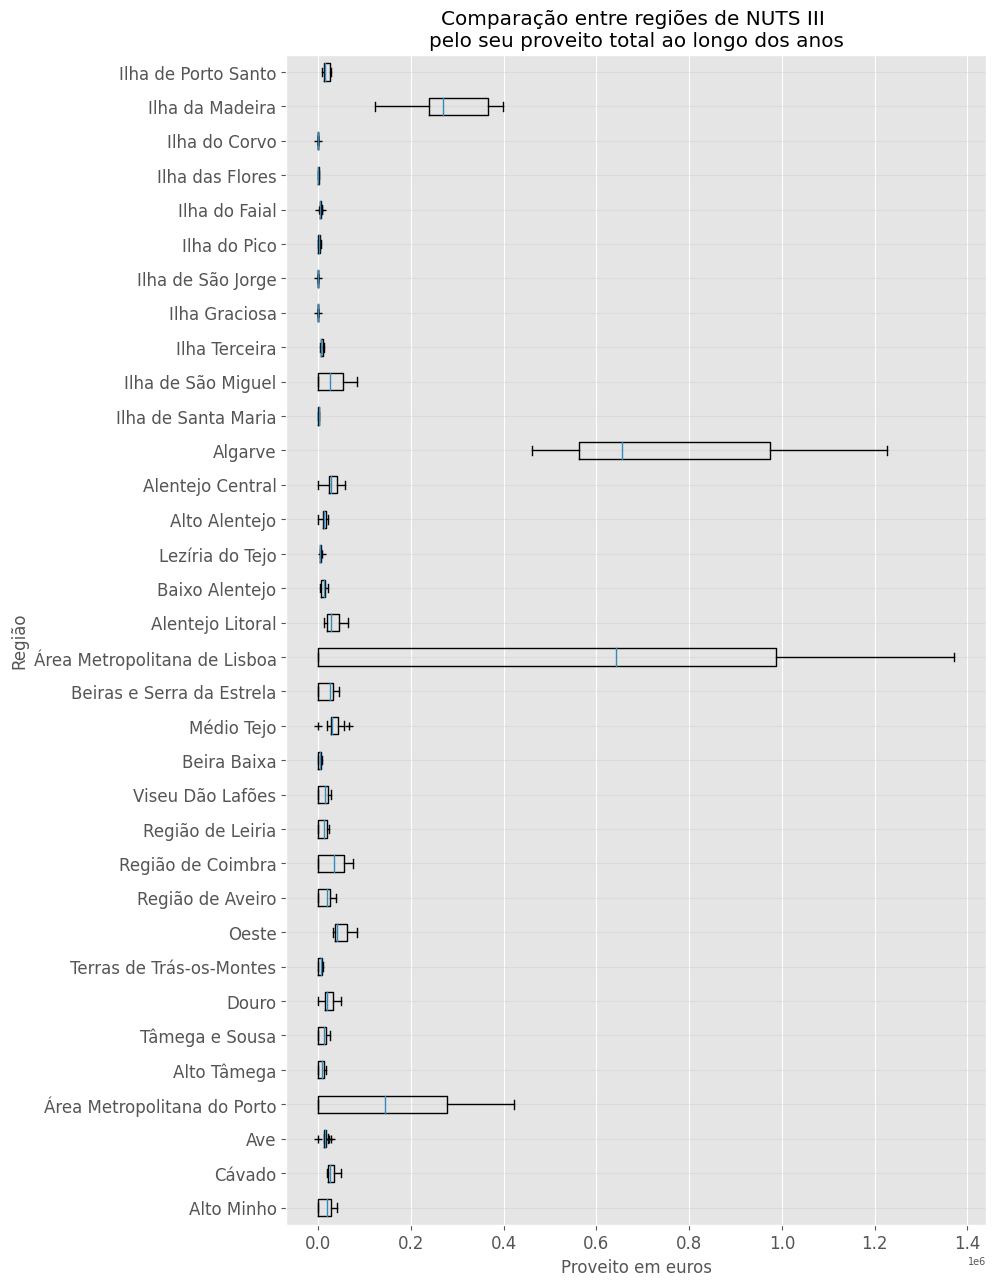

In [5]:

def boxplotgraph(ag):
    pordata_temp = pordata.loc[ag]
    y = pordata_temp['Região']
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8,18)
    fig.canvas.manager.set_window_title('Boxplot: '+ag)
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
    data = pordata_temp.iloc[:,1:13].transpose()
    bp = ax.boxplot(data,notch=False, sym='+', vert=False, whis=1.5)
    
    ax.set_yticklabels(y)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set(axisbelow=True, 
        title='Comparação entre regiões de '+ag+' \npelo seu proveito total ao longo dos anos',
        xlabel='Proveito em euros',
        ylabel='Região',)
    ax.tick_params(axis='both', which='major', labelsize=12)

    #plt.gca().set_position([0, 0, 1, 1])
    fig.savefig('../Guiao7/images/turismo_plt/ex4'+ag+'.svg',format='SVG')
    
boxplotgraph('NUTS III')


Representação usando barras da mediana entre 2009 e 2020 para os 10 municípios 
com maiores proveitos totais no conjunto destes anos. 


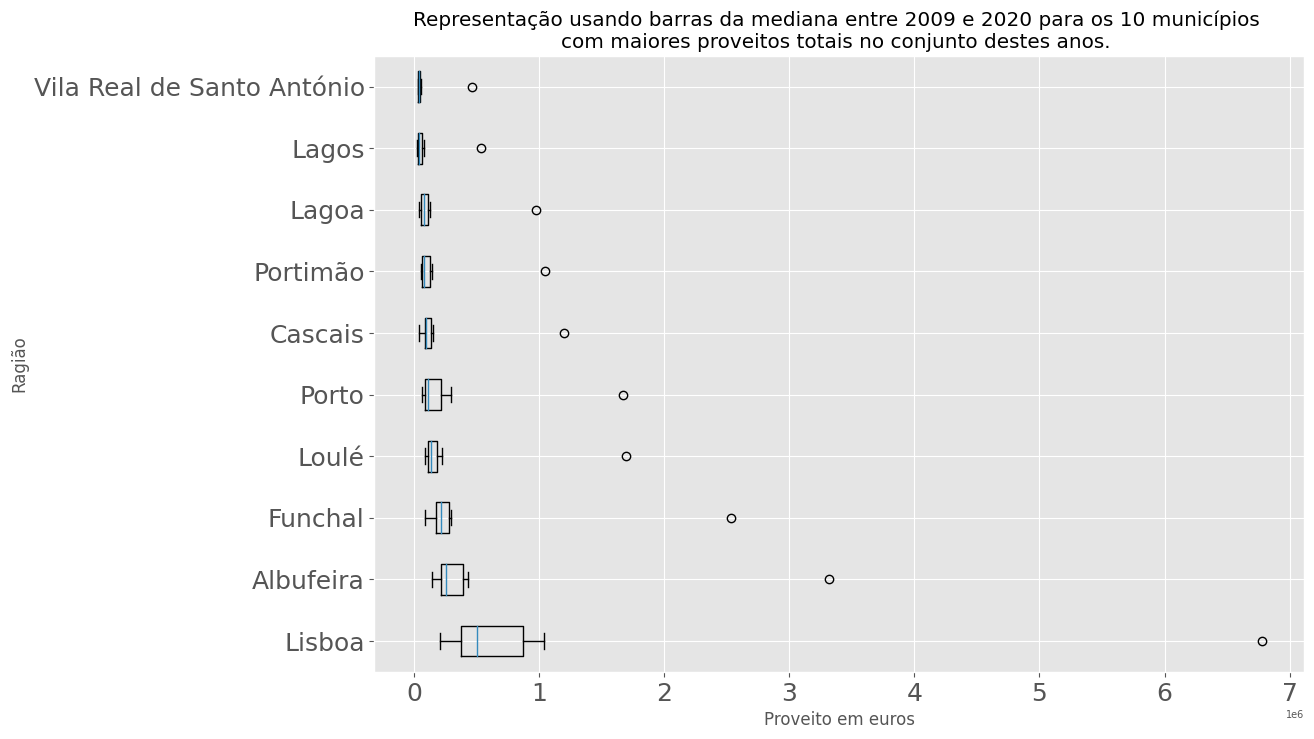

In [10]:

pordata_mun= pordata.loc['Município','Região':'TOTAL_2020']
pordata_mun_t = pordata_mun.loc[:,'TOTAL_2009':].sum(axis=1)
pordata_mun['Soma'] = pordata_mun_t
pordata_mun_10L = pordata_mun.nlargest(10,columns='Soma')



fig,ax = plt.subplots()
fig.set_size_inches(12,8)


ax.boxplot(pordata_mun_10L.iloc[:,1:].transpose(),vert=False)

ax.set_yticklabels(pordata_mun_10L['Região'])
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('Ragião')
ax.set_xlabel('Proveito em euros')
ax.set_title('Representação usando barras da mediana entre 2009 e 2020 para os 10 municípios \ncom maiores proveitos totais no conjunto destes anos. ')
fig.savefig('../Guiao7/images/turismo_plt/ex5.svg',dpi=300, bbox_inches = "tight")
